In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
VA_data_path = 'D:/PolyU/URIS/Part2_projects/WEMOM_V1/Data/All_Data/text_VA_clean.csv'
save_path = 'D:/PolyU/URIS/Part2_projects/WEMOM_V1/Data/Saves/'
df = pd.read_csv(VA_data_path)

<>:7: SyntaxWarning: invalid escape sequence '\A'
<>:7: SyntaxWarning: invalid escape sequence '\A'
C:\Users\27980\AppData\Local\Temp\ipykernel_41120\2971747513.py:7: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('Valence\Arousal')


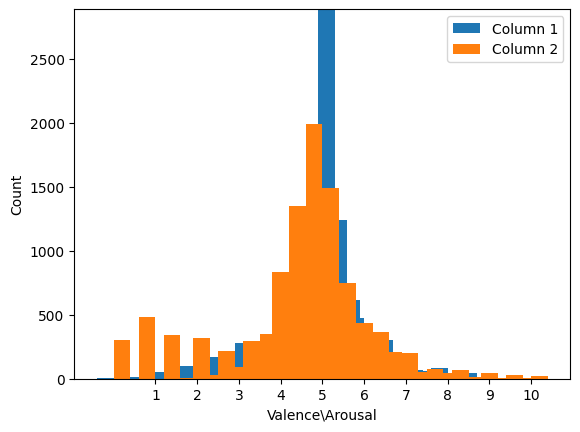

In [3]:

count_valence = df['Valence'].value_counts().sort_index()
count_arousal = df['Arousal'].value_counts().sort_index()

plt.bar(count_valence.index - 0.2, count_valence.values, width=0.4, label='Column 1', align='center')
plt.bar(count_arousal.index + 0.2, count_arousal.values, width=0.4, label='Column 2', align='center')

plt.xlabel('Valence\Arousal')
plt.ylabel('Count')
plt.xticks(range(1, 11))  
plt.ylim(0, max(count_valence.max(), count_arousal.max()) + 1) 
plt.legend()
plt.show()

In [9]:
data1 = df['Valence'].tolist()
data2 = df['Arousal'].tolist()

print("Data1 (Valence):", data1)
print("Data2 (Arousal):", data2)

kde1 = stats.gaussian_kde(data1)
kde2 = stats.gaussian_kde(data2)

Data1 (Valence): [5.300000000000001, 4.699999999999999, 6.6000000000000005, 6.9, 7.1, 5.300000000000001, 5.6000000000000005, 6.0, 6.0, 6.0, 5.300000000000001, 6.1, 7.0, 4.9, 4.4, 6.800000000000001, 7.1, 7.4, 6.800000000000001, 5.699999999999999, 5.6000000000000005, 5.300000000000001, 6.800000000000001, 7.9, 6.0, 7.4, 6.5, 6.4, 7.1, 5.300000000000001, 6.1, 6.6000000000000005, 7.1, 6.5, 5.300000000000001, 5.6000000000000005, 4.4, 7.6, 5.300000000000001, 5.300000000000001, 5.6000000000000005, 5.300000000000001, 5.6000000000000005, 5.300000000000001, 4.8, 6.6000000000000005, 6.1, 5.6000000000000005, 5.6000000000000005, 4.9, 4.2, 5.6000000000000005, 6.800000000000001, 6.0, 5.300000000000001, 5.300000000000001, 6.5, 5.300000000000001, 5.300000000000001, 5.6000000000000005, 5.6000000000000005, 6.9, 6.5, 5.300000000000001, 5.6000000000000005, 5.300000000000001, 6.1, 5.6000000000000005, 5.9, 7.0, 6.5, 6.5, 5.0, 5.0, 5.699999999999999, 6.800000000000001, 5.0, 5.300000000000001, 5.699999999999999

       Original Value  New Value
0                 5.3   6.603537
1                 4.7   4.986550
2                 6.6   4.182047
3                 6.9   5.050526
4                 7.1   6.094220
...               ...        ...
12827             4.7   4.729453
12828             9.3   4.015831
12829             4.7   3.420652
12830             4.0   5.619042
12831             4.7   5.058290

[12832 rows x 2 columns]


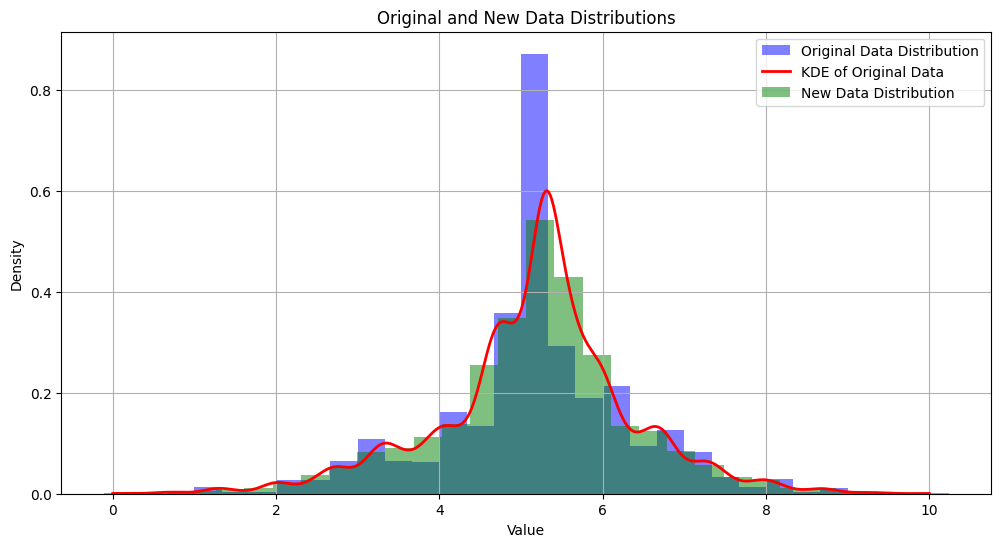

In [7]:
x1 = np.linspace(min(data1), max(data1), 1000)
kde_values1 = kde1(x1)

new_data1 = kde1.resample(size=len(data1)).flatten()

result_df1 = pd.DataFrame({
    'Original Value': data1,
    'New Value': new_data1,
}, index=df.index)  

print(result_df1)

plt.figure(figsize=(12, 6))
plt.hist(data1, bins=30, density=True, alpha=0.5, color='blue', label='Original Data Distribution')
plt.plot(x1, kde_values1, color='red', label='KDE of Original Data', linewidth=2)
plt.hist(new_data1, bins=30, density=True, alpha=0.5, color='green', label='New Data Distribution')
plt.title('Original and New Data Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()


       Original Value  New Value
0                 4.6   5.726887
1                 5.0   6.032786
2                 4.6   4.408516
3                 5.7   2.377862
4                 5.8   5.480302
...               ...        ...
12827             0.6   4.872500
12828             6.2   3.702394
12829             0.0   2.937533
12830             5.0   3.274613
12831             1.2   5.351679

[12832 rows x 2 columns]


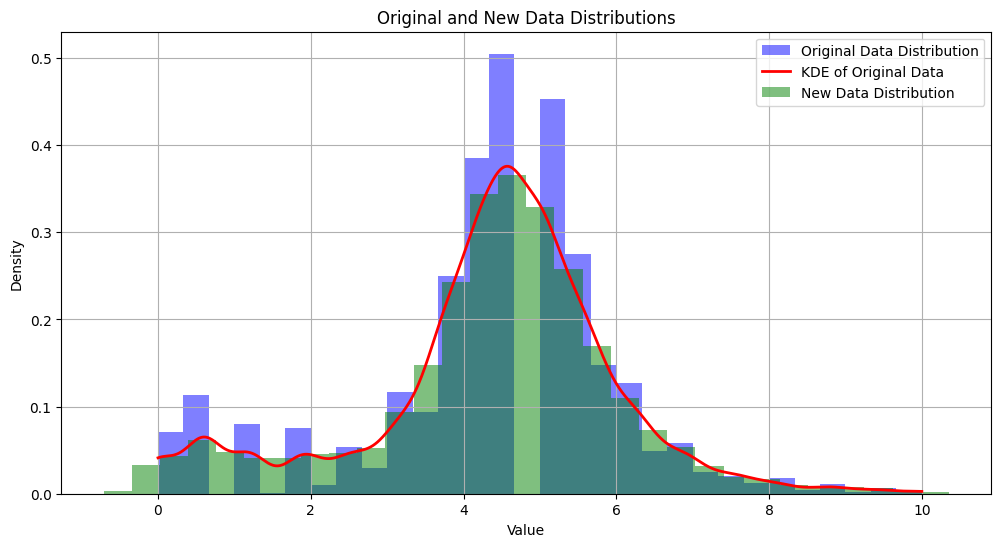

In [8]:
x2 = np.linspace(min(data2), max(data2), 1000)
kde_values2 = kde2(x2)

new_data2 = kde2.resample(size=len(data2)).flatten()

result_df2 = pd.DataFrame({
    'Original Value': data2,
    'New Value': new_data2,
}, index=df.index)  

print(result_df2)

plt.figure(figsize=(12, 6))
plt.hist(data2, bins=30, density=True, alpha=0.5, color='blue', label='Original Data Distribution')
plt.plot(x2, kde_values2, color='red', label='KDE of Original Data', linewidth=2)
plt.hist(new_data2, bins=30, density=True, alpha=0.5, color='green', label='New Data Distribution')
plt.title('Original and New Data Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

In [15]:
valence_lst = new_data1.round(2)
arousal_lst = new_data2.round(2)

In [16]:
print(f"Number of Arousal: {len(arousal_lst)}")
print(f"Number of Valence: {len(valence_lst)}")

Number of Arousal: 12832
Number of Valence: 12832


In [17]:
label_lst = np.zeros(valence_lst.shape, dtype=int)
label_lst[(valence_lst <= 5) & (arousal_lst <= 5)] = 0
label_lst[(valence_lst <= 5) & (arousal_lst > 5)] = 1
label_lst[(valence_lst > 5) & (arousal_lst <= 5)] = 2
label_lst[(valence_lst > 5) & (arousal_lst > 5)] = 3

In [28]:
sentence_lst = np.load('D:/PolyU/URIS/Part2_projects/WEMOM_V1/Data/All_Data/' + "sentences_text.npy", allow_pickle=True)

In [29]:
lists = {
    'label': label_lst,
    'valence': valence_lst,
    'arousal': arousal_lst,
    'sentence': sentence_lst
}

In [31]:
new_lists = {}
for name, lst in lists.items():
    new_lists[f'Text_VAE_{name}_lst'] = lst[:6000] 
    new_lists[f'Text_CL_{name}_lst'] = lst[6000:]  

for key, value in new_lists.items():
    np.save(os.path.join(save_path + f"{key}.npy"), value)

for key in new_lists.keys():
    print(f"{key}.npy saved successfully!")

Text_VAE_label_lst.npy saved successfully!
Text_CL_label_lst.npy saved successfully!
Text_VAE_valence_lst.npy saved successfully!
Text_CL_valence_lst.npy saved successfully!
Text_VAE_arousal_lst.npy saved successfully!
Text_CL_arousal_lst.npy saved successfully!
Text_VAE_sentence_lst.npy saved successfully!
Text_CL_sentence_lst.npy saved successfully!


In [32]:
for key, value in new_lists.items():
    print(f"Name of the list: {key}")
    print(f"Shape of list: {np.shape(value)}")

Name of the list: Text_VAE_label_lst
Shape of list: (6000,)
Name of the list: Text_CL_label_lst
Shape of list: (6832,)
Name of the list: Text_VAE_valence_lst
Shape of list: (6000,)
Name of the list: Text_CL_valence_lst
Shape of list: (6832,)
Name of the list: Text_VAE_arousal_lst
Shape of list: (6000,)
Name of the list: Text_CL_arousal_lst
Shape of list: (6832,)
Name of the list: Text_VAE_sentence_lst
Shape of list: (6000,)
Name of the list: Text_CL_sentence_lst
Shape of list: (6832,)


In [33]:
id2word = np.load('D:/PolyU/URIS/Part2_projects/WEMOM_V1/Data/All_Data/id2word_text.npy', allow_pickle=True).item()
vocab_lst = np.load('D:/PolyU/URIS/Part2_projects/WEMOM_V1/Data/All_Data/'+'vocab_text.npy', allow_pickle=True)
sentence_lst = np.load('D:/PolyU/URIS/Part2_projects/WEMOM_V1/Data/All_Data/'+'sentences_text.npy', allow_pickle=True)

print(id2word)
print(vocab_lst)
print(sentence_lst) 

{0: '<unk>', 1: '<pad>', 2: '<sos>', 3: '<eos>', 4: 'one', 5: 'like', 6: 'said', 7: 'would', 8: 'new', 9: 'im', 10: 'time', 11: 'people', 12: 'us', 13: 'get', 14: 'day', 15: 'person', 16: 'back', 17: 'see', 18: 'go', 19: 'dont', 20: 'make', 21: 'know', 22: 'good', 23: 'love', 24: 'first', 25: 'could', 26: 'today', 27: 'well', 28: 'also', 29: 'life', 30: 'help', 31: 'way', 32: 'even', 33: 'got', 34: 'going', 35: 'many', 36: 'two', 37: 'may', 38: 'work', 39: 'need', 40: 'much', 41: 'still', 42: 'year', 43: 'great', 44: 'think', 45: 'take', 46: 'last', 47: 'world', 48: 'years', 49: 'never', 50: 'million', 51: 'right', 52: 'hong', 53: 'birthday', 54: 'home', 55: 'around', 56: 'thanks', 57: 'long', 58: 'something', 59: 'come', 60: 'made', 61: 'happy', 62: 'night', 63: 'want', 64: 'little', 65: 'really', 66: 'please', 67: 'find', 68: 'man', 69: 'friends', 70: 'city', 71: 'white', 72: 'everyone', 73: 'support', 74: 'every', 75: 'cant', 76: 'family', 77: 'didnt', 78: 'look', 79: 'say', 80: 'ev